In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/raw/corner.csv',
               encoding='latin-1')
df

,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,spectators,player1,team
0,489042,378960.0,cross,329.0,19.0,NaN,NaN,NaN,NaN,38807.0,10261.0
1,489042,378992.0,short,330.0,22.0,NaN,NaN,NaN,NaN,40565.0,10261.0
2,489042,378996.0,cross,329.0,22.0,NaN,NaN,NaN,NaN,38807.0,10261.0
3,489042,379352.0,cross,329.0,48.0,NaN,NaN,NaN,NaN,24154.0,10260.0
4,489042,379366.0,cross,329.0,51.0,NaN,NaN,NaN,NaN,38807.0,10261.0
...,...,...,...,...,...,...,...,...,...,...,...
167844,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167845,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167846,2030171,4941137.0,short_left,871.0,90.0,2.0,NaN,11.0,NaN,75004.0,8370.0
167847,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

match_id                   int64
id                       float64
subtype                   object
event_incident_typefk    float64
elapsed                  float64
elapsed_plus             float64
del                      float64
coordinates              float64
spectators               float64
player1                  float64
team                     float64
dtype: object

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [5]:
df.describe()

,match_id,id,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,spectators,player1,team
count,167849.00,87839.00,87839.00,87839.00,5603.00,86.00,40005.00,1.00,85376.00,87753.00
mean,1604347.07,2944113.54,567.44,48.26,2.48,1.00,1138.52,27131.00,98993.24,9518.08
std,489855.43,1727978.06,268.83,26.44,1.59,0.00,1783.82,NaN,112167.96,9001.93
min,489042.00,375535.00,14.00,1.00,1.00,1.00,11.00,27131.00,2763.00,1601.00
25%,1229333.00,1311307.50,329.00,26.00,1.00,1.00,11.00,27131.00,30686.00,8535.00
50%,1778176.00,2952429.00,330.00,48.00,2.00,1.00,441.00,27131.00,39306.00,8661.00
75%,1989815.00,4507305.50,869.00,71.00,3.00,1.00,451.00,27131.00,155623.00,9875.00
max,2118418.00,5623571.00,873.00,90.00,53.00,1.00,4569.00,27131.00,750435.00,208931.00


In [6]:
simple_profile = df.describe(include='all')
simple_profile

,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,spectators,player1,team
count,167849.00,87839.00,87676,87839.00,87839.00,5603.00,86.00,40005.00,1.00,85376.00,87753.00
unique,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,42251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1604347.07,2944113.54,NaN,567.44,48.26,2.48,1.00,1138.52,27131.00,98993.24,9518.08
std,489855.43,1727978.06,NaN,268.83,26.44,1.59,0.00,1783.82,NaN,112167.96,9001.93
min,489042.00,375535.00,NaN,14.00,1.00,1.00,1.00,11.00,27131.00,2763.00,1601.00
25%,1229333.00,1311307.50,NaN,329.00,26.00,1.00,1.00,11.00,27131.00,30686.00,8535.00
50%,1778176.00,2952429.00,NaN,330.00,48.00,2.00,1.00,441.00,27131.00,39306.00,8661.00
75%,1989815.00,4507305.50,NaN,869.00,71.00,3.00,1.00,451.00,27131.00,155623.00,9875.00


In [7]:
profile = ProfileReport(df, title="Export Data Profiling Report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def get_basic_profile(dataframe):
    quantile_range = 0.5
    results = {}
    
    for column in dataframe.columns:
        count = df[column].count()
        nans = df[column].isna().sum()
        min = df[column].min()
        max = df[column].max()
        median = df[column].median()
        std = df[column].std()
        kurt = df[column].kurt()
        skew = df[column].skew()
        quant = df[column].quantile(q=quantile_range)
        
        results[column] = {'count': count,
                            'count_na': nans,
                            'min':min,
                            'max':max,
                            'median':median,
                            'std':std,
                            'kurt':kurt,
                            'skew':skew,
                            'quant {quantile_range}':quant}
 
    return results

In [10]:
num_columns = df.select_dtypes(include=['int64','float64'])
basic_profile = get_basic_profile(num_columns)
basic_profile

{'match_id': {'count': 167849,
  'count_na': 0,
  'min': 489042,
  'max': 2118418,
  'median': 1778176.0,
  'std': 489855.4340281072,
  'kurt': -0.3545083743576809,
  'skew': -1.0494950021053608,
  'quant {quantile_range}': 1778176.0},
 'id': {'count': 87839,
  'count_na': 80010,
  'min': 375535.0,
  'max': 5623571.0,
  'median': 2952429.0,
  'std': 1727978.0620779223,
  'kurt': -1.5393328426646753,
  'skew': 0.04640338724951673,
  'quant {quantile_range}': 2952429.0},
 'event_incident_typefk': {'count': 87839,
  'count_na': 80010,
  'min': 14.0,
  'max': 873.0,
  'median': 330.0,
  'std': 268.8259884445448,
  'kurt': -1.9291156495404187,
  'skew': 0.2207811829565639,
  'quant {quantile_range}': 330.0},
 'elapsed': {'count': 87839,
  'count_na': 80010,
  'min': 1.0,
  'max': 90.0,
  'median': 48.0,
  'std': 26.443062311256867,
  'kurt': -1.1858575904878883,
  'skew': -0.04263718333769923,
  'quant {quantile_range}': 48.0},
 'elapsed_plus': {'count': 5603,
  'count_na': 162246,
  'min':

Text(0.5, 1.0, 'Height count')

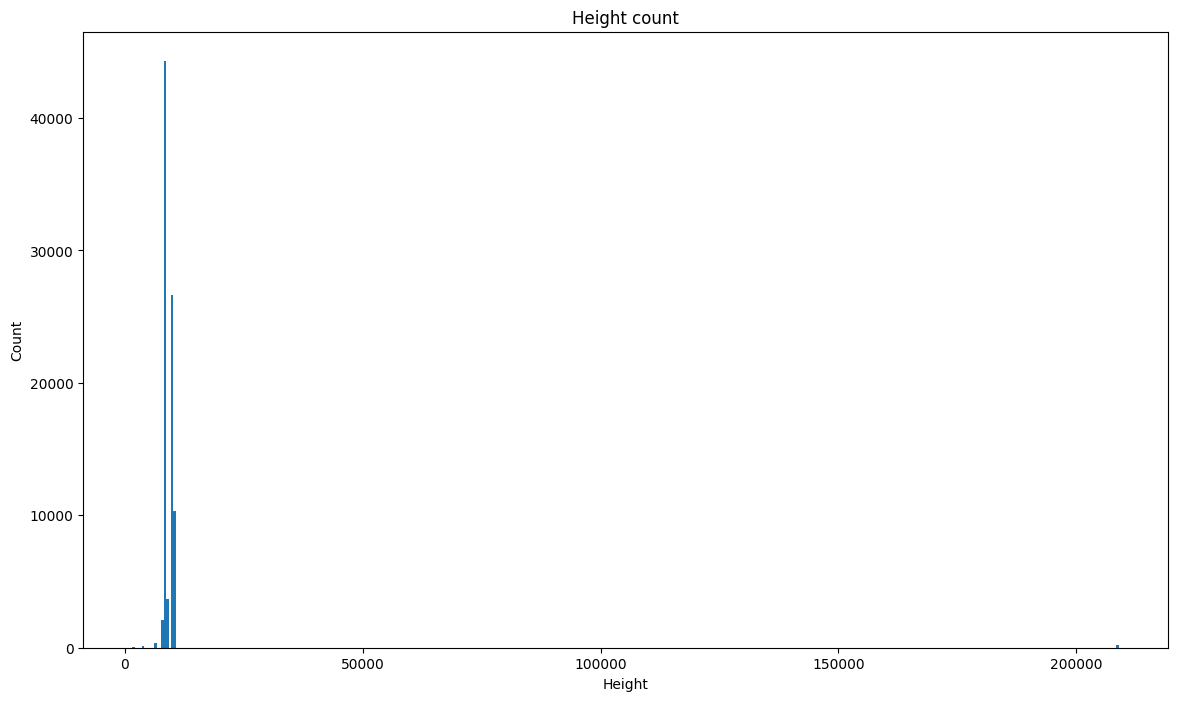

In [11]:
# square root choice
bins = int(np.ceil(np.sqrt(len(num_columns['team']))))
 
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.hist(num_columns['team'], bins)
 
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Height')
ax.set_ylabel('Count')
ax.set_title(r'Height count')
# plt.savefig("mygraph.jpg")